# COVID-19 Tracker

## Basic code and data

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
from pandas_datareader import wb
# plt.style.use('dark_background')

%config InlineBackend.figure_format = 'svg'

In [2]:
# This gets the data from John Hopkins university -- it is online in github

header = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
global_confirmed = pd.read_csv(header + "time_series_covid19_confirmed_global.csv")
global_deaths = pd.read_csv(header + "time_series_covid19_deaths_global.csv")
us_deaths = pd.read_csv(header + "time_series_covid19_deaths_US.csv")
us_confirmed = pd.read_csv(header + "time_series_covid19_confirmed_US.csv")

In [3]:
START_DATE = pd.to_datetime('Feb 15, 2020')

# converting JHU names to World Bank names
WB_ISO2_CODES = {
    "Korea, South": "KR"
}

COUNTRIES = {}
for i in global_confirmed["Country/Region"]:
    COUNTRIES[i] = None

In [4]:

def to_timeseries(s):
    s.index = pd.DatetimeIndex(s.index)
    return s 
    
def diff_clip(s):
    return s.diff().clip(lower=0.0, upper=None) # clip out negative observations
    
# Some functions to plot the data by county, state and country

def do_diff_plots(ts1, ts2, title1, title2):
    ts1 = diff_clip(to_timeseries(ts1))
    ts2 = diff_clip(to_timeseries(ts2))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,4]) 
    for ax, titl, ts in zip(axes, [title1, title2], [ts1, ts2]):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ts.plot.area(ax=ax, title=titl, alpha=.7)
        ts.rolling(7, center=True).mean().plot(ax=ax, color="black")
        ax.set_xlim(left=START_DATE)
    return fig    

def plot_county(county, state):
    ts1 = us_deaths[(us_deaths["Province_State"] == state) & (us_deaths["Admin2"] == county) ].iloc[:, 12:].sum()
    ts2 = us_confirmed[(us_confirmed["Province_State"] == state) & (us_confirmed["Admin2"] == county) ].iloc[:, 11:].sum()
    do_diff_plots(ts1, ts2, county + ", " + state + ", Deaths", county + ", " + state + ", Confirmed")
        
def plot_state(state):
    ts1 = us_deaths[(us_deaths["Province_State"] == state)].iloc[:, 12:].sum()
    ts2 = us_confirmed[(us_confirmed["Province_State"] == state)].iloc[:, 11:].sum()
    do_diff_plots(ts1, ts2, state + ", Deaths", state + ", Confirmed",)
    
def plot_global(country):
    if not(country in COUNTRIES):
        print("Country ", country, "not in dataset. Check COUNTRIES dictionary.")
    else:
        ts1 = global_deaths[global_deaths["Country/Region"] == country].iloc[:, 6:].sum()
        ts2 = global_confirmed[global_confirmed["Country/Region"] == country].iloc[:, 6:].sum()
        do_diff_plots(ts1, ts2, country + ", Deaths", country + ", Confirmed")
    
def plot_county_pc(county, state):
    population = us_deaths[(us_deaths["Province_State"] == state) & (us_deaths["Admin2"] == county)].loc[:, "Population"].sum()
    ts1 = us_deaths[(us_deaths["Province_State"] == state) & (us_deaths["Admin2"] == county) ].iloc[:, 12:].sum()
    ts2 = us_confirmed[(us_confirmed["Province_State"] == state) & (us_confirmed["Admin2"] == county) ].iloc[:, 11:].sum()
    ts1 = ts1 * 1000000 / population
    ts2 = ts2 * 1000000 / population
    do_diff_plots(ts1, ts2, county + ", " + state + ", Deaths \n per million", county + ", " + state + ", Confirmed \n per million")
        
def plot_state_pc(state):
    # getting the state population from the table
    population = us_deaths[(us_deaths["Province_State"] == state)].loc[:, "Population"].sum() 
    ts1 = us_deaths[(us_deaths["Province_State"] == state)].iloc[:, 12:].sum()
    ts2 = us_confirmed[(us_confirmed["Province_State"] == state)].iloc[:, 11:].sum()
    ts1 = ts1 * 1000000 / population
    ts2 = ts2 * 1000000 / population
    do_diff_plots(ts1, ts2, state + ", Deaths \n per million", state + ", Confirmed \n per million")

def plot_global_pc(country):
    if not(country in COUNTRIES):
        print("Country ", country, " not in dataset. Check COUNTRIES dictionary.")
    else:
        try:
            if country in WB_ISO2_CODES:
                iso2 = WB_ISO2_CODES[country]
            else:
                iso2 = wb.get_countries().query('name == "' + country + '"').iso2c.values[0]
        except:
            print("Country ", country, ": No matching World Bank ISO code available. Update WB_ISO2_CODES.")
        else:
            population = wb.download(indicator="SP.POP.TOTL", country=iso2, start=2010, end=2020).dropna().values[0, 0]
            ts1 = global_deaths[global_deaths["Country/Region"] == country].iloc[:, 6:].sum()
            ts2 = global_confirmed[global_confirmed["Country/Region"] == country].iloc[:, 6:].sum()
            ts1 = ts1 * 1000000 / population
            ts2 = ts2 * 1000000 / population
            do_diff_plots(ts1, ts2, country + ", Deaths \n per million", country + ", Confirmed \n per million")

def plot_global_list(ls):
    for country in ls:
        plot_global(country);

def plot_global_pc_list(ls):
    for country in ls:
        plot_global_pc(country);

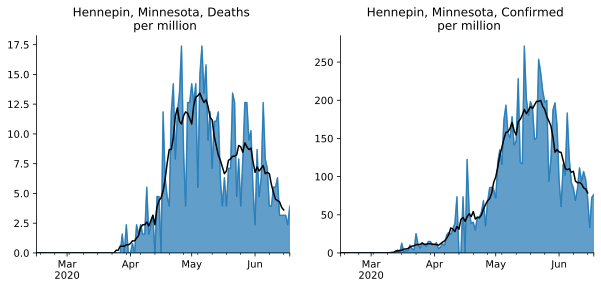

In [5]:
plot_county_pc("Hennepin", "Minnesota")

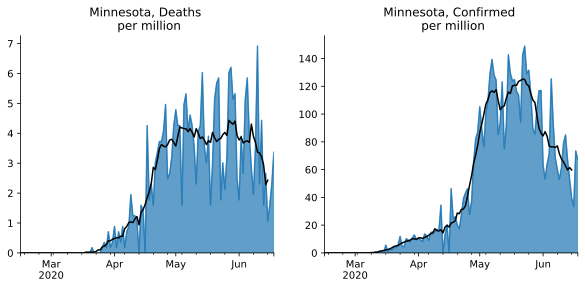

In [6]:
plot_state_pc("Minnesota")

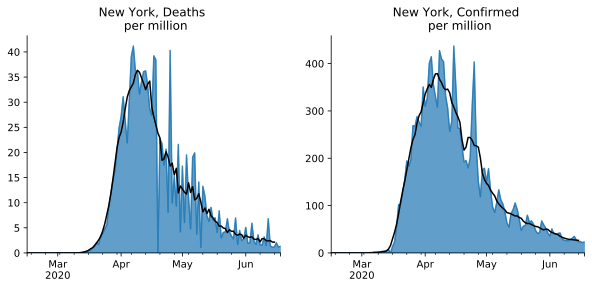

In [7]:
plot_state_pc("New York")

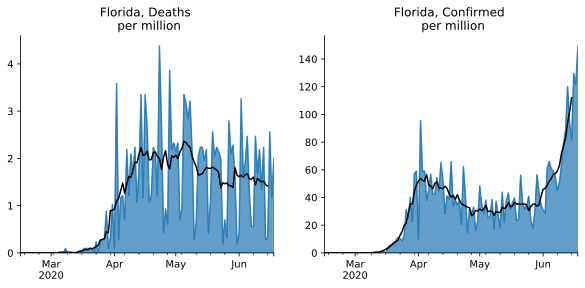

In [8]:
plot_state_pc("Florida")

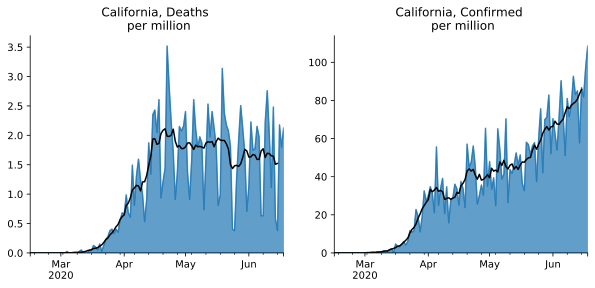

In [9]:
plot_state_pc("California")

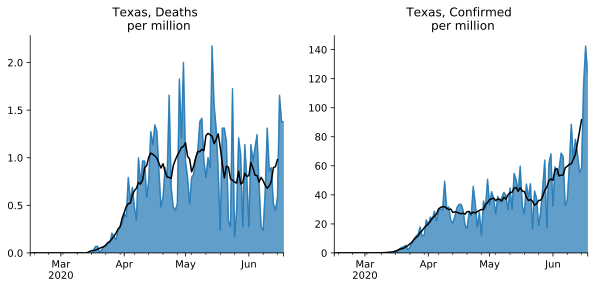

In [10]:
plot_state_pc("Texas")

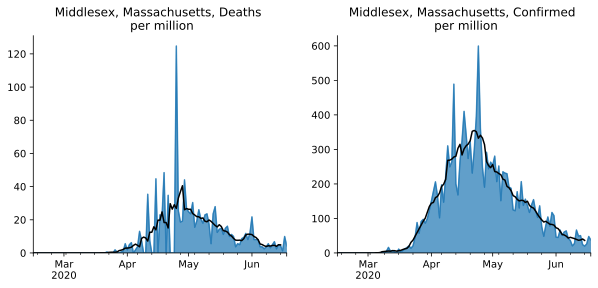

In [11]:
plot_county_pc("Middlesex", "Massachusetts")

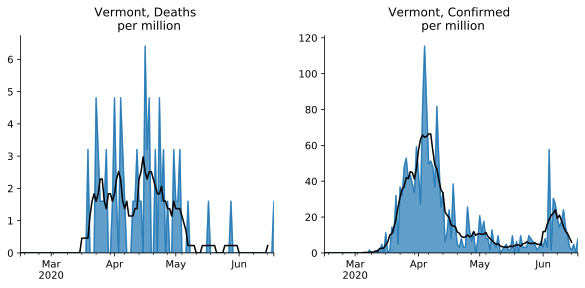

In [12]:
plot_state_pc("Vermont")

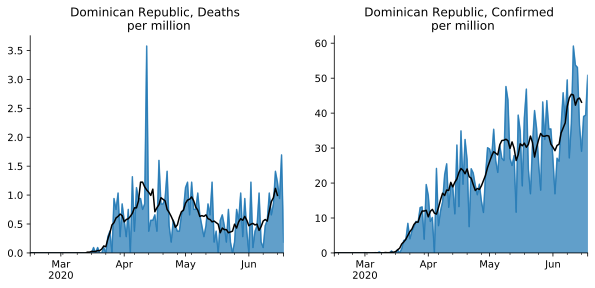

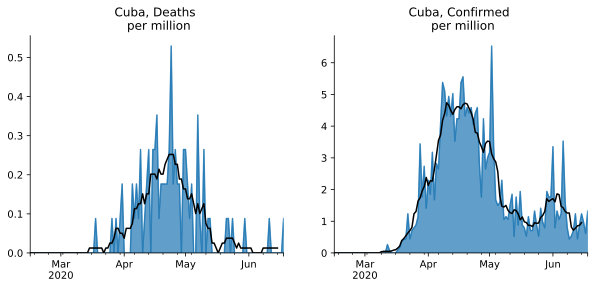

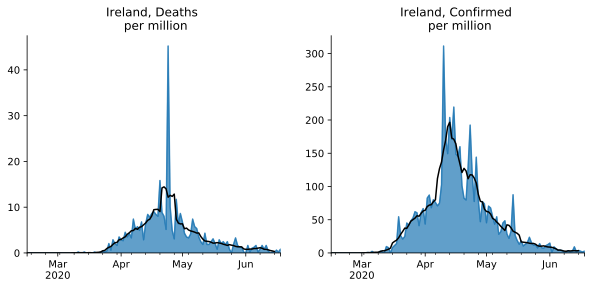

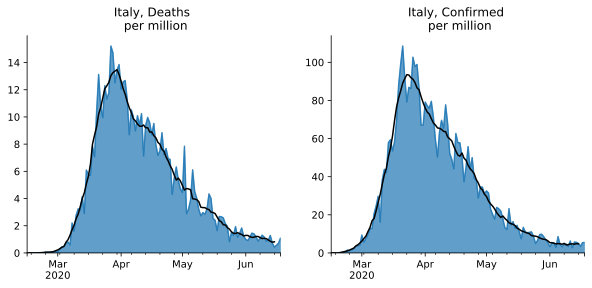

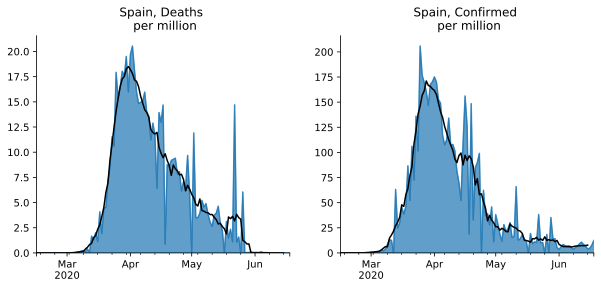

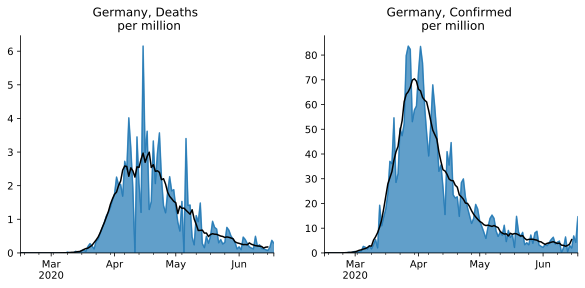

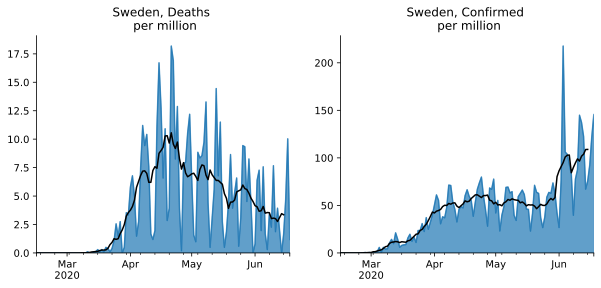

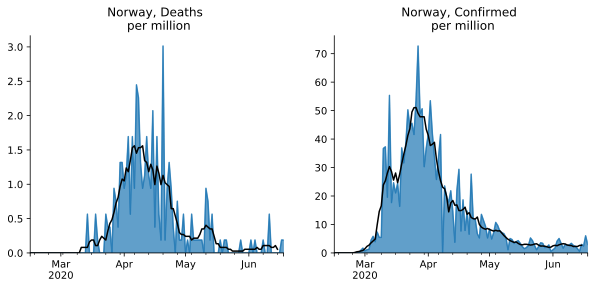

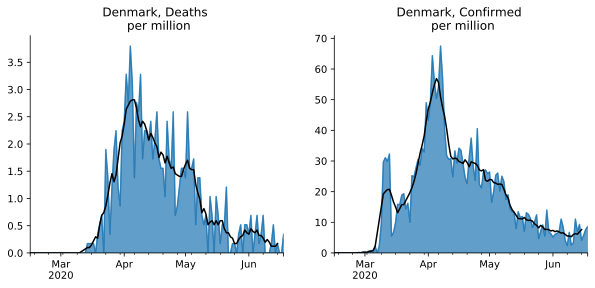

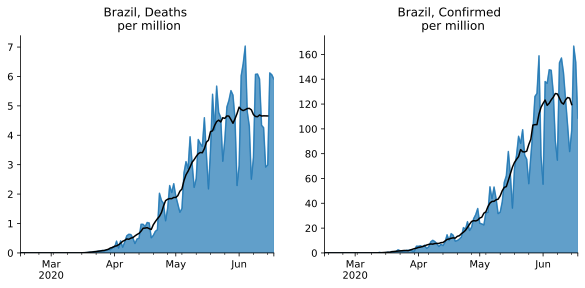

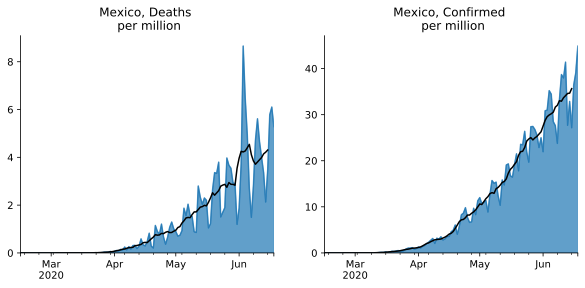

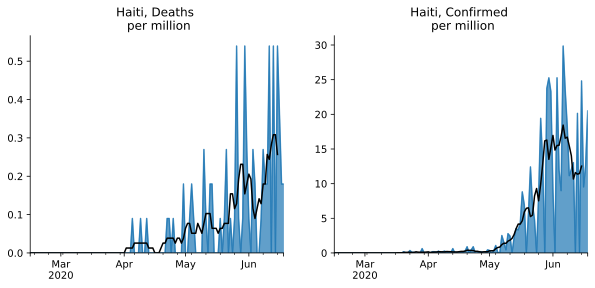

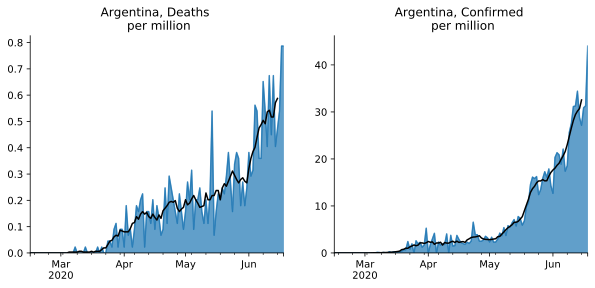

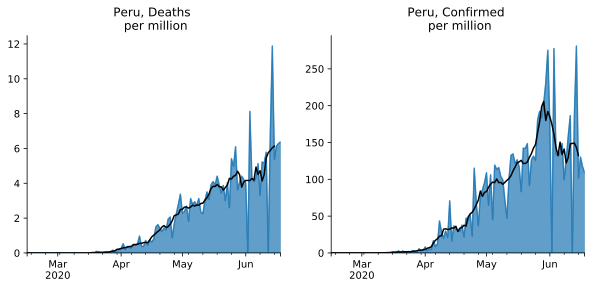

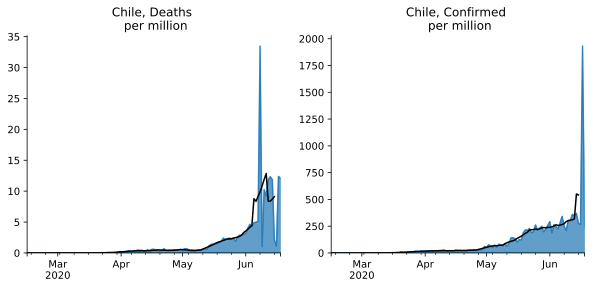

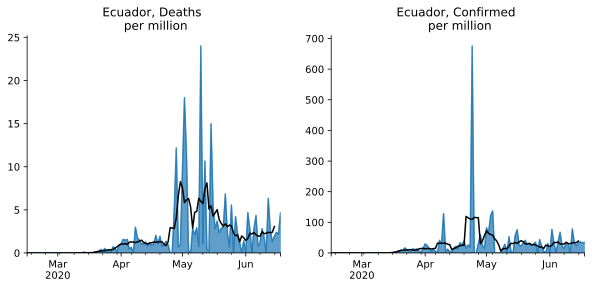

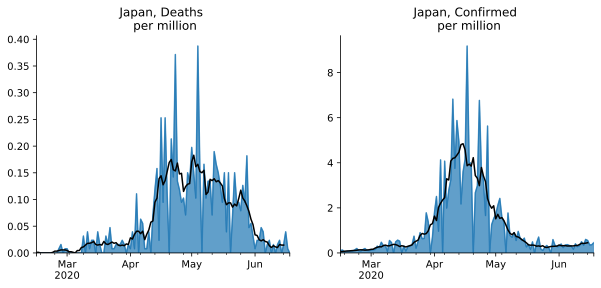

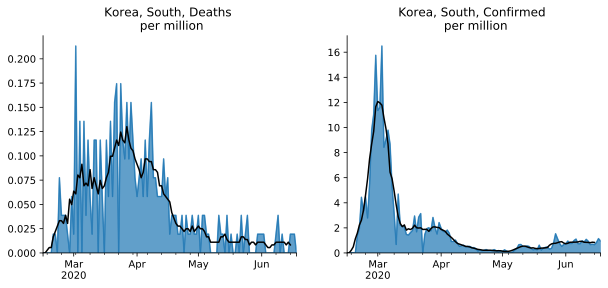

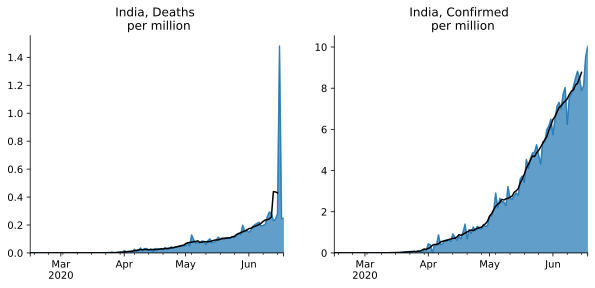

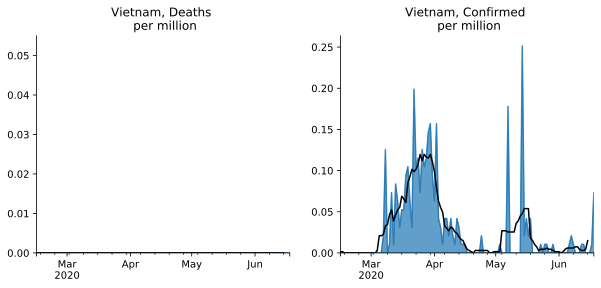

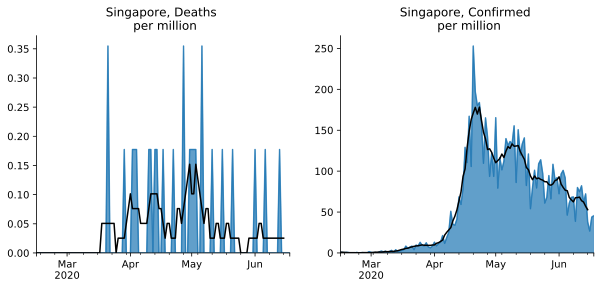

In [13]:
plot_global_pc_list(["Dominican Republic", "Cuba", "Ireland", "Italy", "Spain", "Germany", "Sweden", "Norway", "Denmark", "Brazil", "Mexico", "Haiti", "Argentina", "Peru", "Chile", "Ecuador", "Japan", "Korea, South", "India", "Vietnam", "Singapore"])

In [14]:
list(COUNTRIES.keys())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'